<a href="https://colab.research.google.com/github/DarioDell/Regression_problem/blob/main/Diamonds_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regression problem: 💎 Diamonds price prediction 💍


## About the dataset

The dataset used below will be "diamonds.csv" which represents a range of diamonds with different characteristics such as size and clarity, they also have their prices. I obtained the dataset from Kaggle.<br><br>
The dataset is composed of 50000 rows and 10 columns:<br>


*   **carat**: Diamond weight in carat.<br>
One carat is equivalent to 200 milligrams (0.2 grams). The term "carat" is often abbreviated as "ct." Gemstones are weighed in carats to determine their size and value. For instance, a 1-carat diamond is larger and generally more valuable than a 0.5-carat diamond, assuming other factors such as quality and cut are the same.

*   **cut**: Diamond cutting quality

*   **color**: Diamond color from J (worst) to D (best)

*   **clarity**: A measure of diamond clarity (from left to right is worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)

*   **x**: Diamond length in mm
*   **y**: Diamond width in mm


*   **z**: Diamond depth in mm


*   **depth**: Percentage depth that is equal to z / mean(x,y)


*   **table**: The width of the widest point at the top of the diamond


*   **price** [target variable]: Diamond price




## Load the libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_theme(style="white")

from google.colab import data_table
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
df = pd.read_csv('./diamonds.csv', sep=',', encoding= 'utf-8')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Data pre-processing

In [4]:
# No missings values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
# I check the data types
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

## Univariate analysis

Univariate analysis will commence by dividing the variables into two groups that are qualitative and quantitative. Further, I shall then compute the basic statistics for each. It will make the separate study possible thus encouraging the understanding of various concepts.

In [6]:
def analyze_df(df):
  data_types = dict(df.dtypes)
  numeric_cols = []
  categoric_cols = []
  for c,t in data_types.items():
    if t == np.float64:
      numeric_cols.append([c, 'Continuous quantitative', df[c].mean(), df[c].min(), df[c].max(), df[c].median()])
    elif t == np.int64 or pd.Int64Dtype.is_dtype(t):
      numeric_cols.append([c, 'Discrete quantitative', df[c].mean(), df[c].min(), df[c].max(), df[c].median()])
    else:
      categoric_cols.append([c, f'Qualitative', df[c].nunique()])
  n = pd.DataFrame(numeric_cols, columns=['Name', 'Variable type', 'Mean', 'Min', 'Max', 'Median'])
  c = pd.DataFrame(categoric_cols, columns=['Name', 'Variable type', 'Number of classes'])
  return n, c

numeric_types, categoric_types = analyze_df(df)

### Qualitative variables

The below table contains the columns with qualitative data along with the number of classes that each of them have.

In [7]:
print(categoric_types.to_string(index=False))

   Name Variable type  Number of classes
    cut   Qualitative                  5
  color   Qualitative                  7
clarity   Qualitative                  8


The qualitative variables are displayed to know their distribution of values.

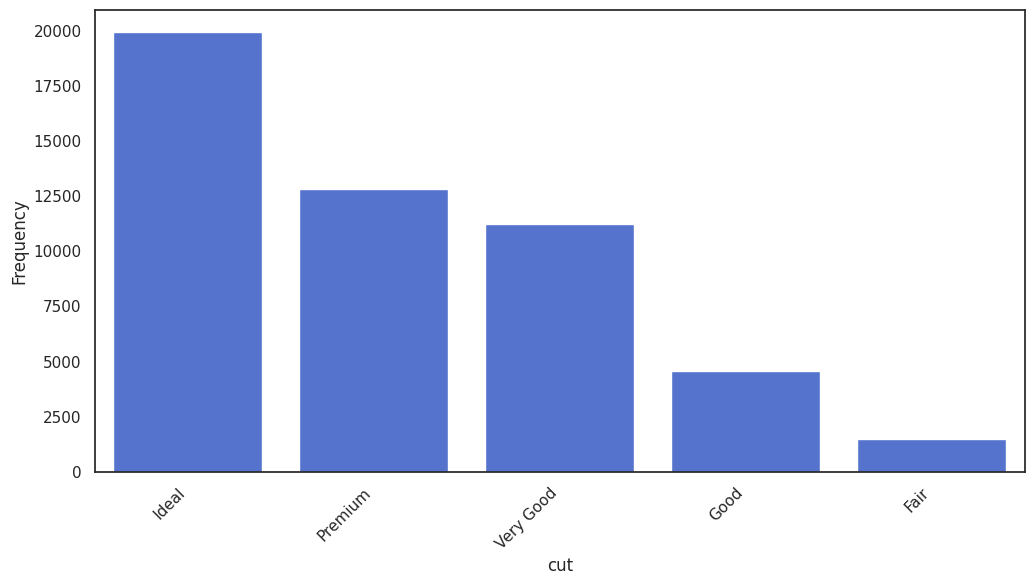

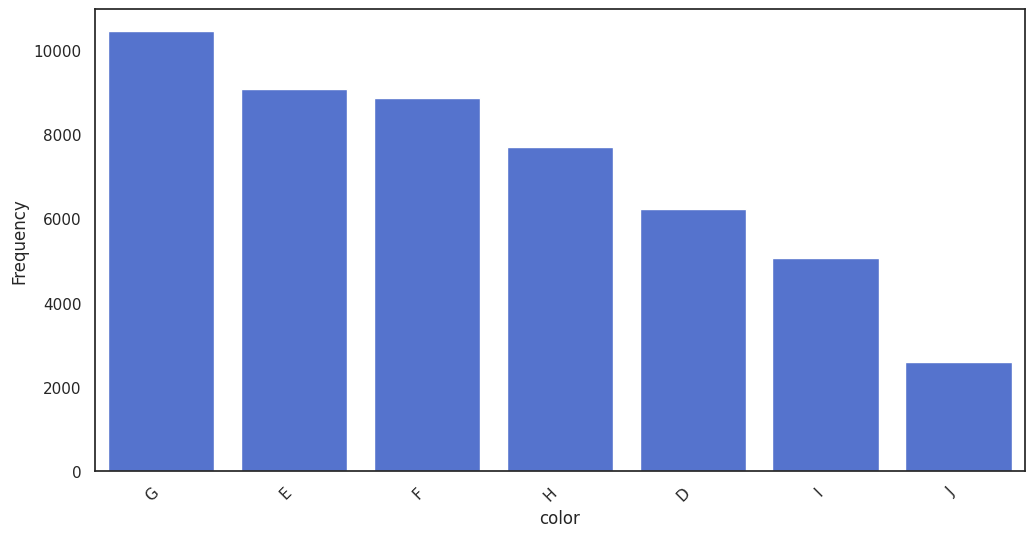

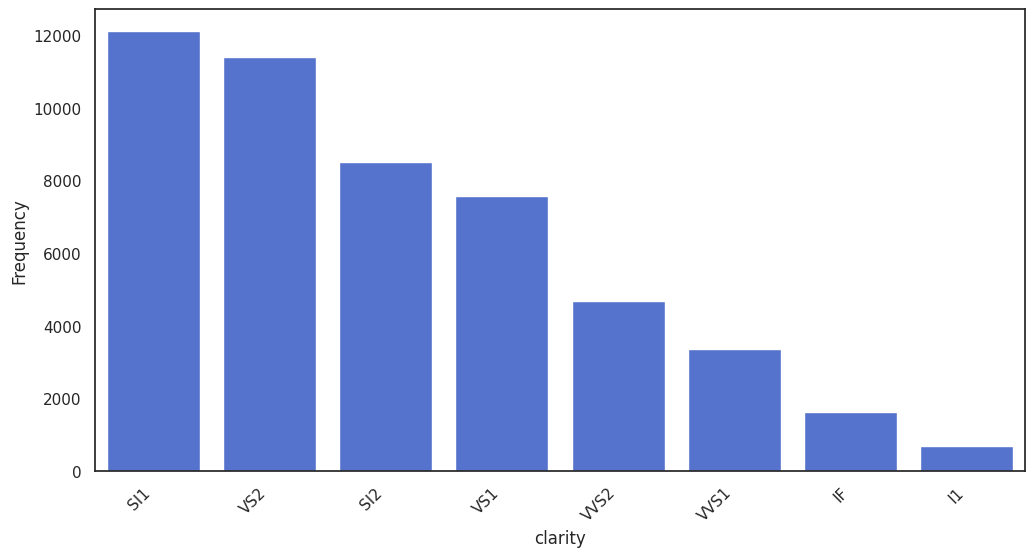

In [8]:
for i in categoric_types.index:
  if categoric_types['Name'][i] != 'flight':

      column = categoric_types['Name'][i]
      fig, ax = plt.subplots(figsize=(12,6))
      chart = sns.countplot(data=df, x=column, color='royalblue', order = df[column].value_counts().index)
      chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
      chart.set_ylabel('Frequency');
      plt.show();

### Quantitative variables

Same analysis as with the qualitative variables but now with the quantitative variables

In [9]:
print(numeric_types.to_string(index=False))

 Name           Variable type        Mean   Min      Max  Median
carat Continuous quantitative    0.799444   0.2     5.01    0.70
depth Continuous quantitative   61.753006  43.0    79.00   61.80
table Continuous quantitative   57.457830  43.0    95.00   57.00
price   Discrete quantitative 3944.805440 326.0 18823.00 2410.00
    x Continuous quantitative    5.734403   0.0    10.74    5.70
    y Continuous quantitative    5.737956   0.0    58.90    5.71
    z Continuous quantitative    3.541056   0.0    31.80    3.53


I graph a histogram with each of the columns to know their distribution.

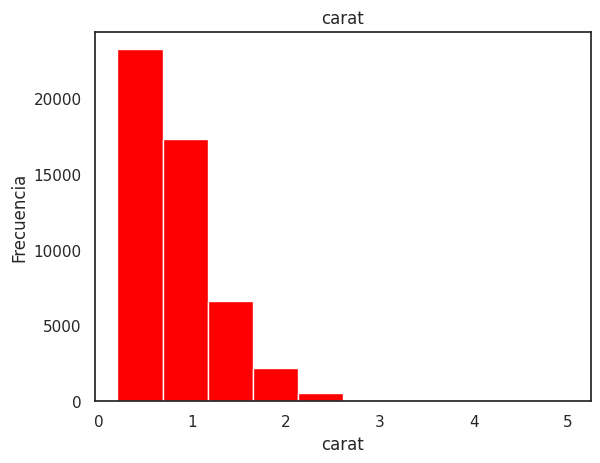

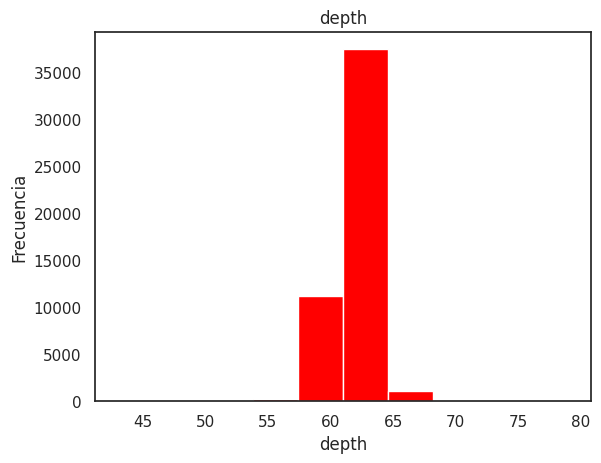

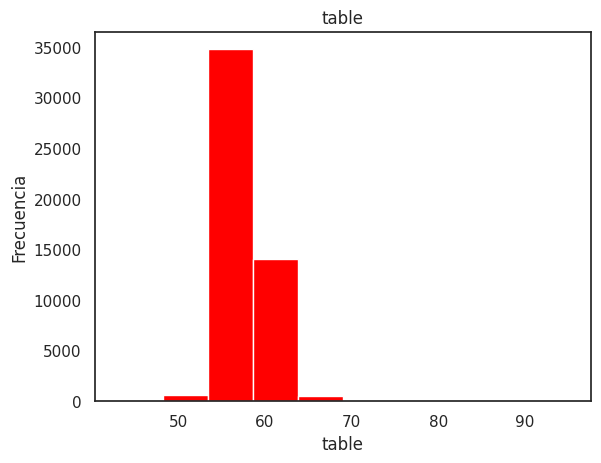

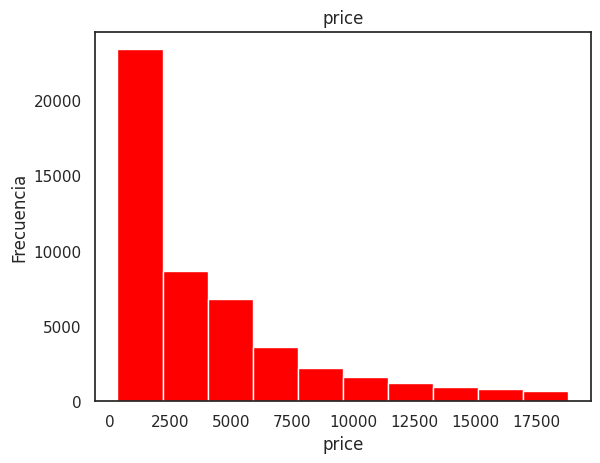

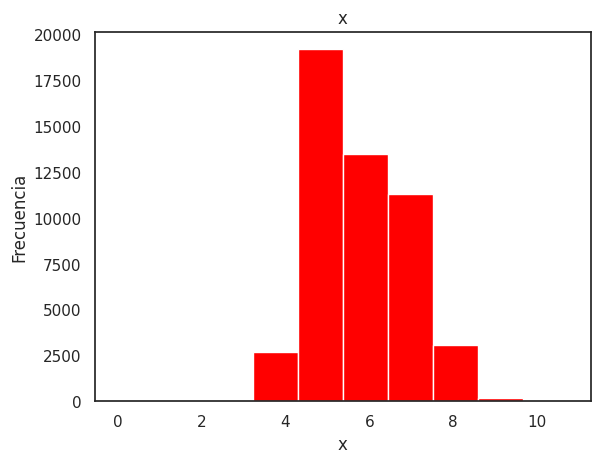

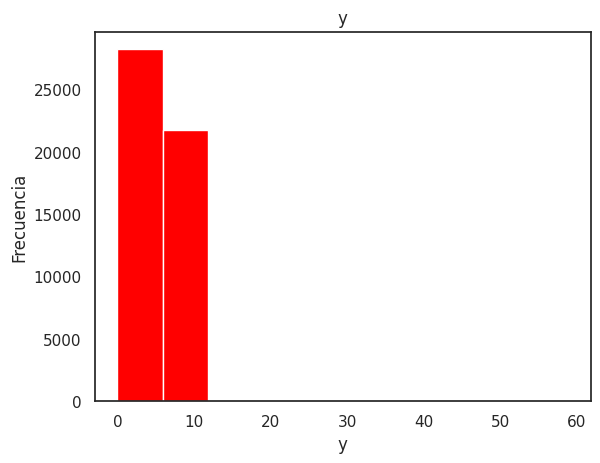

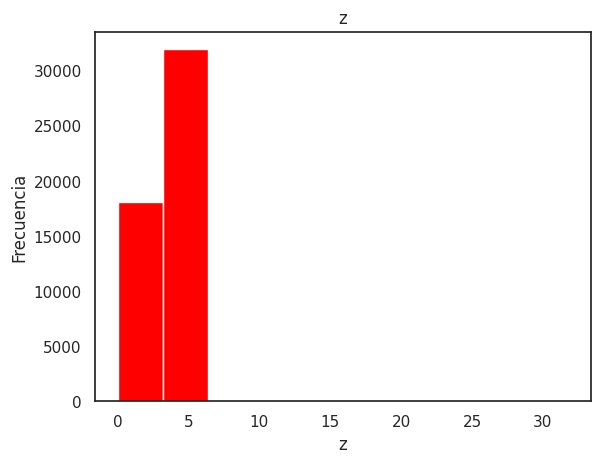

In [10]:
for i in numeric_types.index:
    column = numeric_types['Name'][i]
    plt.hist(df[column], bins=10, color='red')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(column)
    plt.show()


## Bivariate analysis

The analysis of each variable is realized against the objective variable, which in this case is "price".

### Qualitative variable vs objective variable

To know the behavior of the qualitative variables compared to the objective variable I am going to use a BarPlot

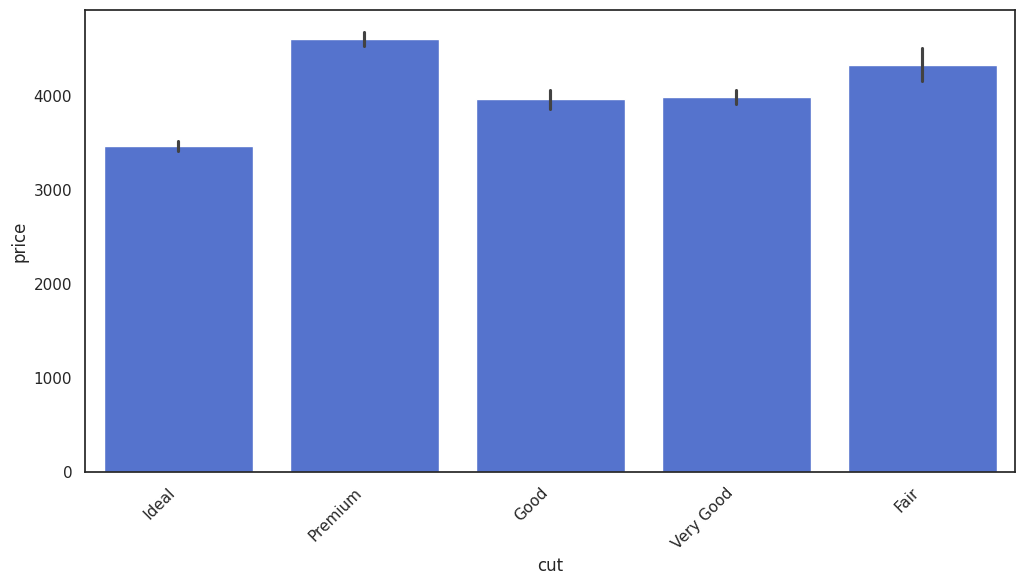

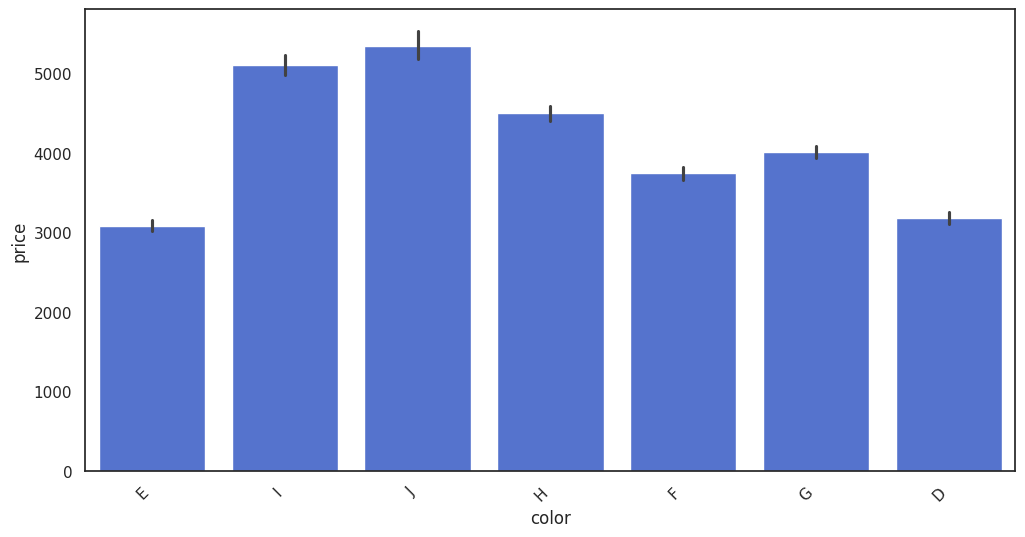

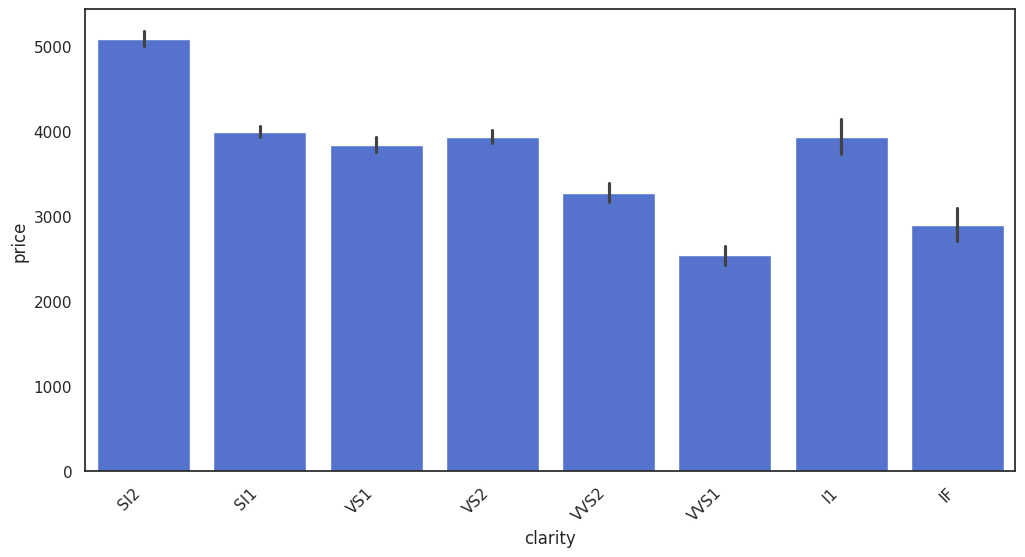

In [11]:
for i in categoric_types.index:

      x_axis = categoric_types['Name'][i]
      y_axis = 'price'
      fig, ax = plt.subplots(figsize=(12,6))
      chart = sns.barplot(data=df, x=x_axis, y=y_axis, color='royalblue')
      chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
      plt.show();

A uniform distribution of values ​​is observed, indicating possible relationships

### Quantitative variables vs objective variable

To know the behavior of the quantitative variables compared to the target variable, I will use a ScatterPlot.

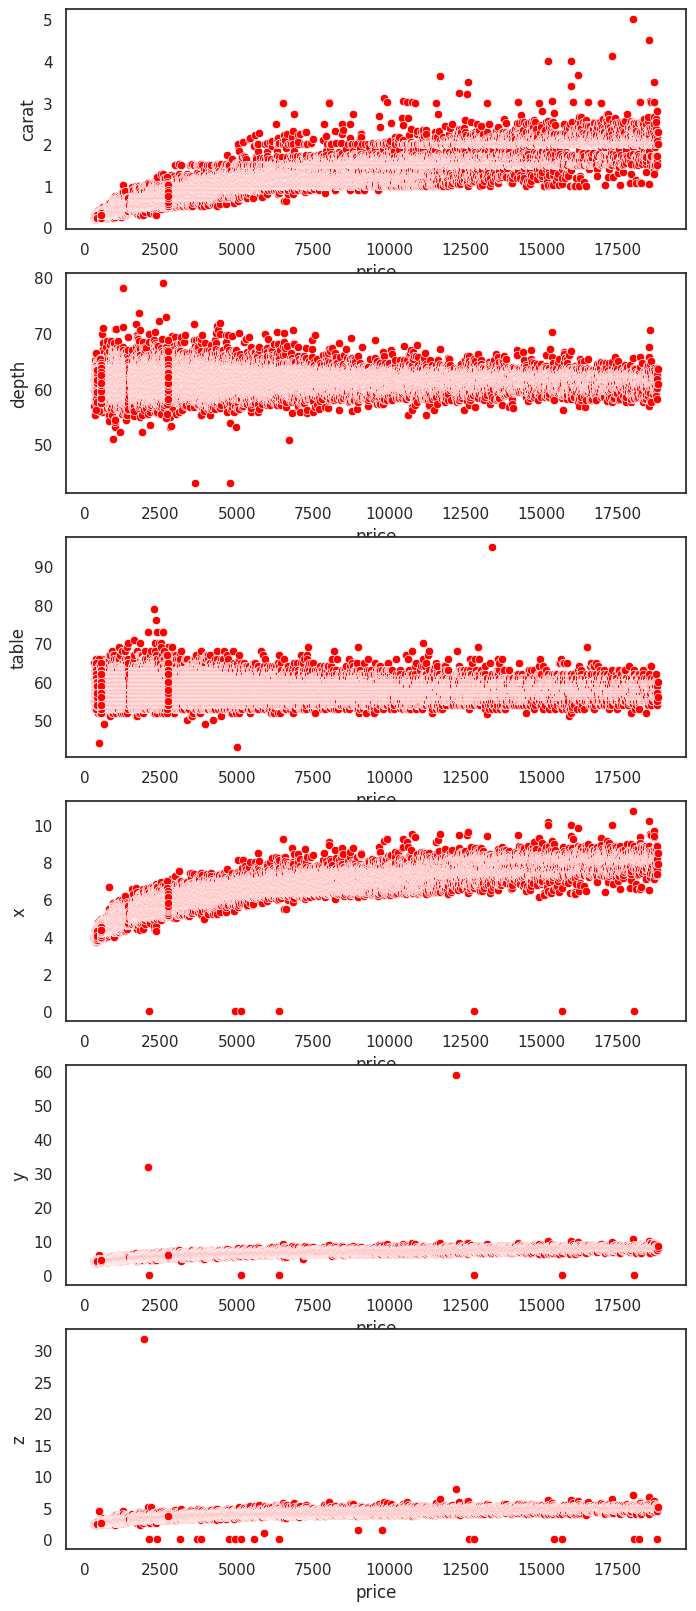

In [12]:
fig, axs = plt.subplots(figsize=(8,20), nrows=6)
sns.scatterplot(data=df, x="price", y="carat", ax=axs[0], color='red')
sns.scatterplot(data=df, x="price", y="depth", ax=axs[1], color='red')
sns.scatterplot(data=df, x="price", y="table", ax=axs[2], color='red');
sns.scatterplot(data=df, x="price", y="x", ax=axs[3], color='red');
sns.scatterplot(data=df, x="price", y="y", ax=axs[4], color='red');
sns.scatterplot(data=df, x="price", y="z", ax=axs[5], color='red');



A uniform distribution of values ​​is observed, indicating possible relationships

## Multivariate analysis

After the study against the target variable, the correlation matrix is ​​calculated to see the dependencies between quantitative variables.

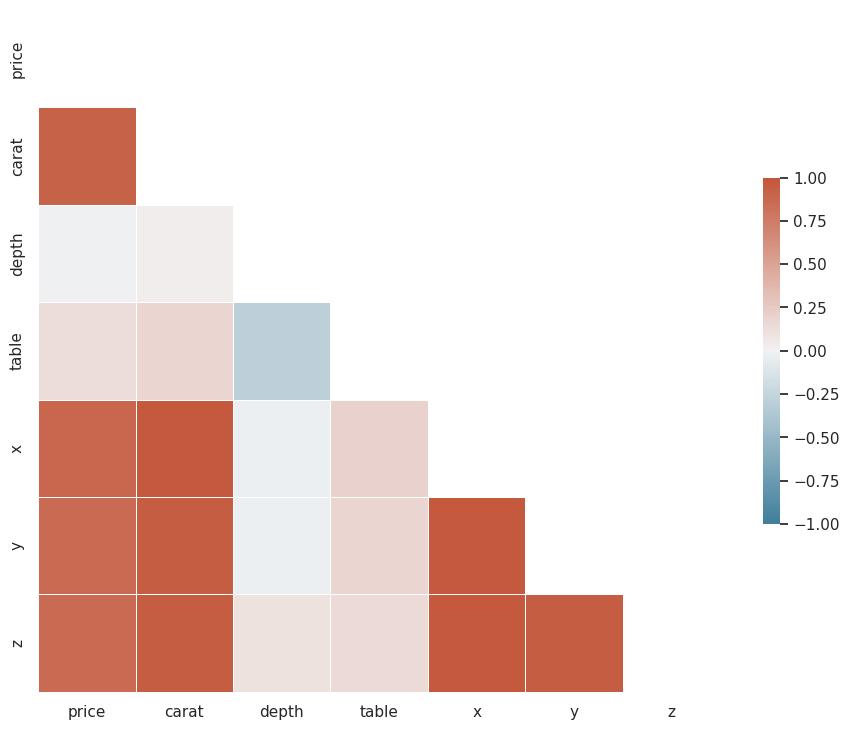

In [13]:

corr = df[['price','carat', 'depth', 'table', 'x', 'y', 'z']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set_theme(style="white")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

The strong red color shows a direct connection between the variables.

## Data preparation

### Detection of outliers

The atypical values ​​of the quantitative variables are analyzed to eliminate them later.

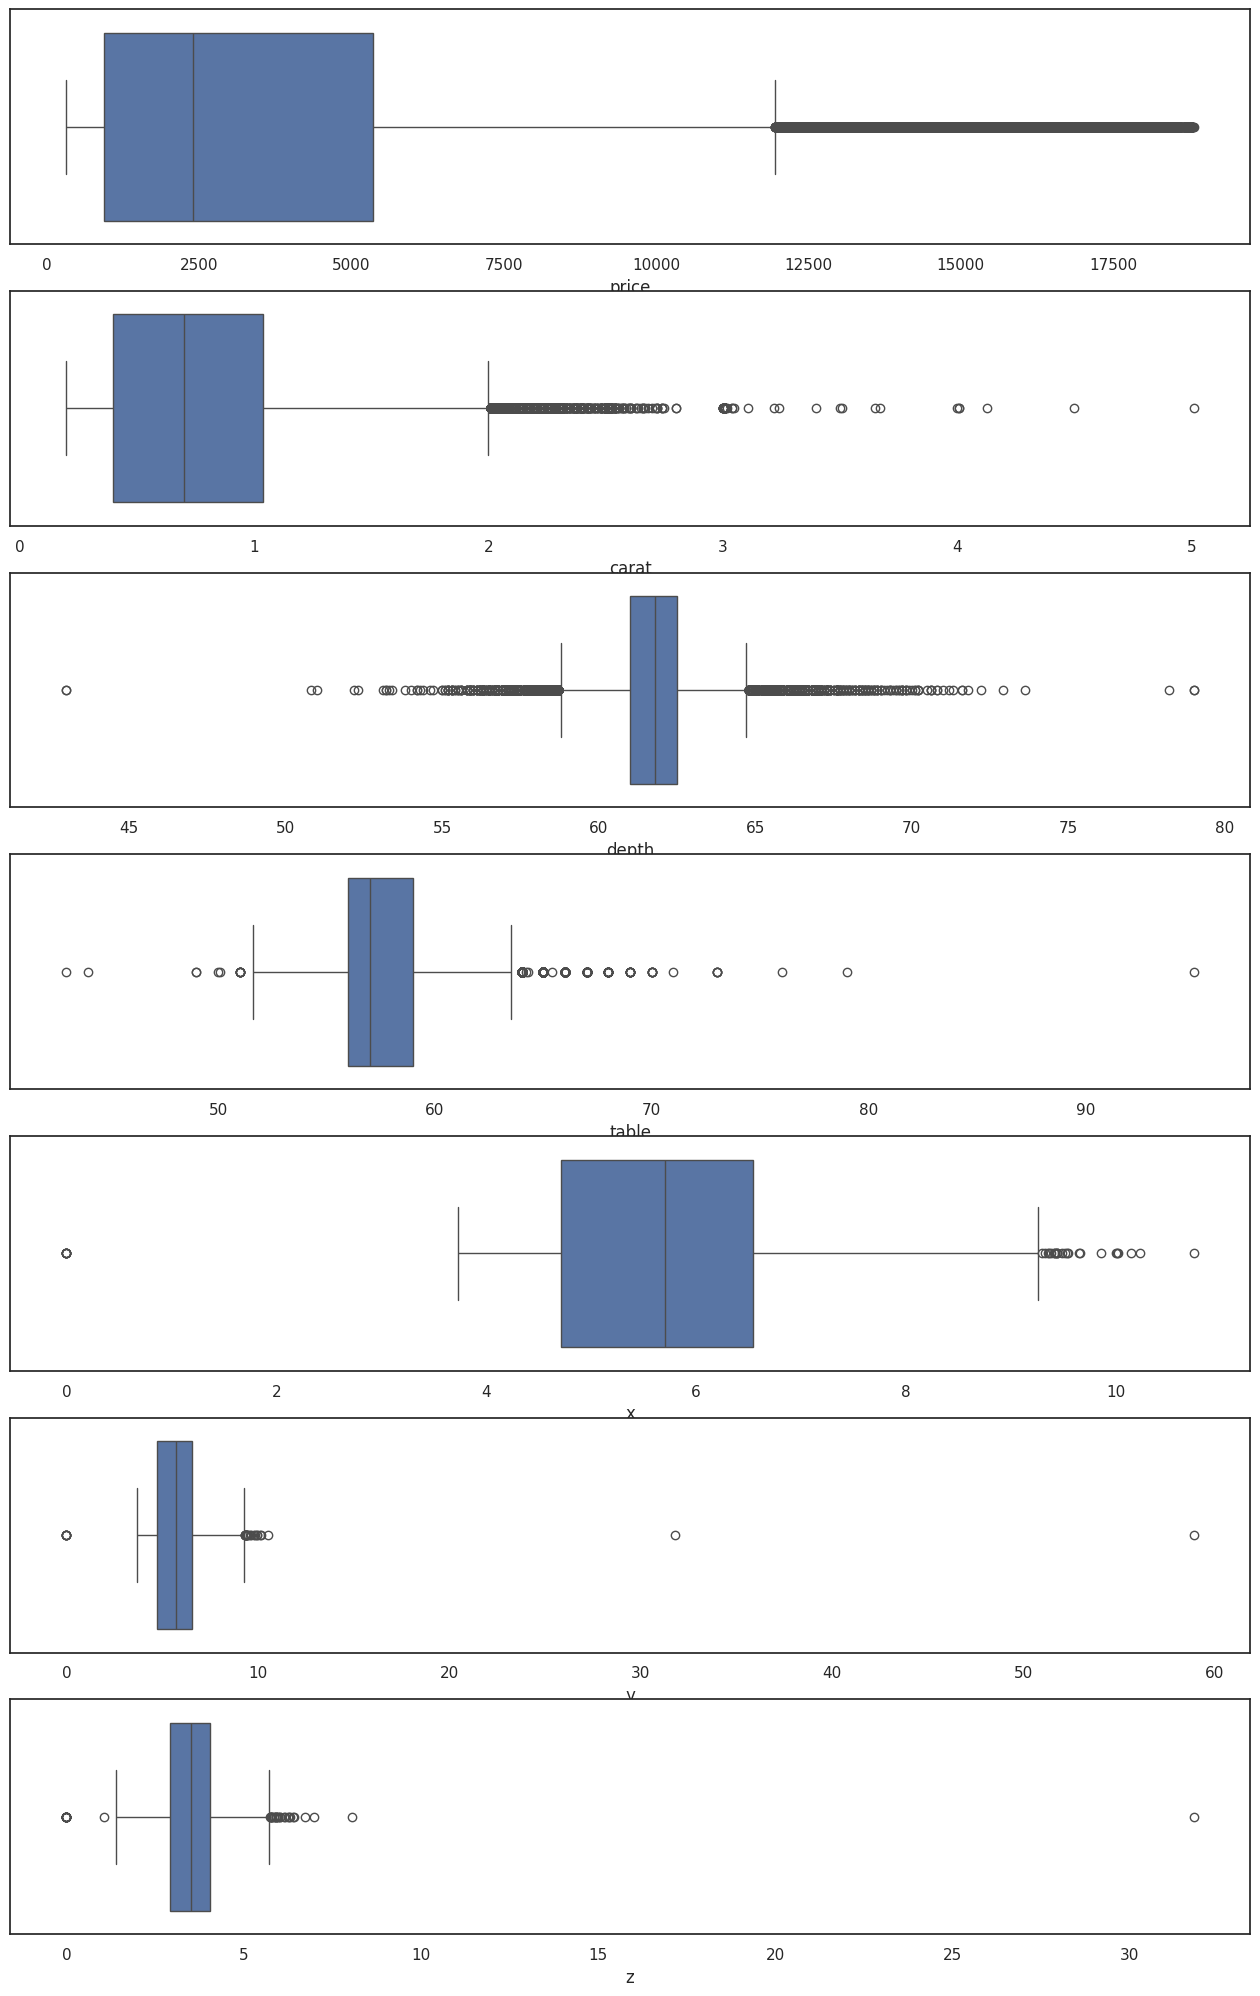

In [14]:
fig, axs = plt.subplots(figsize=(16,25),nrows=7)
sns.boxplot(x=df['price'], ax=axs[0])
sns.boxplot(x=df['carat'], ax=axs[1])
sns.boxplot(x=df['depth'], ax=axs[2])
sns.boxplot(x=df['table'], ax=axs[3]);
sns.boxplot(x=df['x'], ax=axs[4]);
sns.boxplot(x=df['y'], ax=axs[5]);
sns.boxplot(x=df['z'], ax=axs[6]);



### Remove duplicate records

Duplicate rows will be removed from the dataset.

In [15]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print()
print("Removing rows with duplicate values...")
df = df.drop_duplicates()
print()
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 50000
Number of columns: 10

Removing rows with duplicate values...

Number of rows: 49874
Number of columns: 10


### Eliminate outliers

Number of rows (with outliers): 49874
Removing outliers...
Number of rows (without outliers): 43955


<Axes: xlabel='z'>

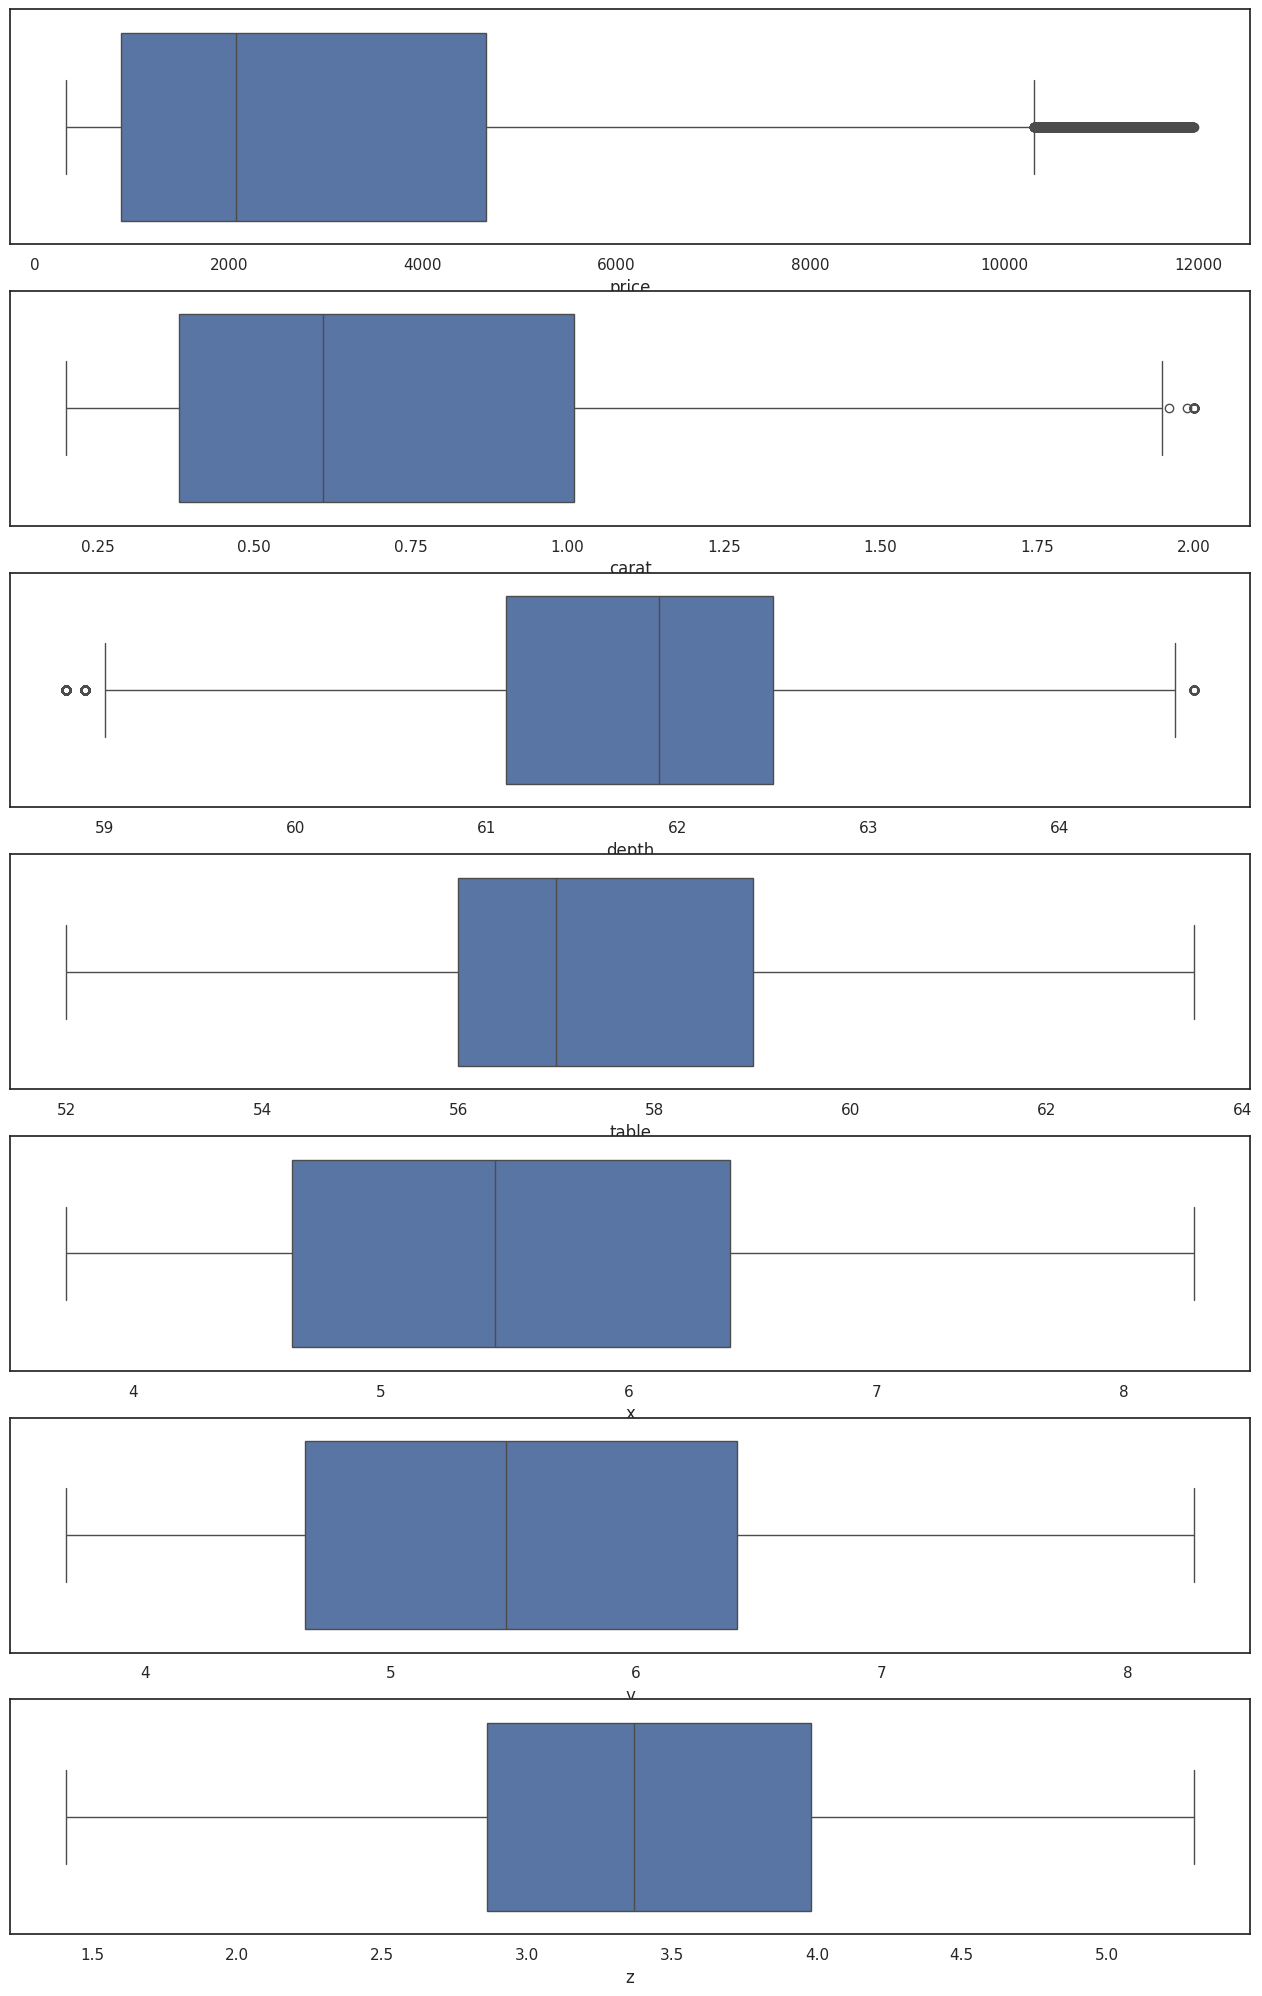

In [16]:
columns_with_outliers = ['price','carat', 'depth', 'table', 'x', 'y', 'z']
print(f"Number of rows (with outliers): {df.shape[0]}")
print("Removing outliers...")
Q1 = df[columns_with_outliers].quantile(0.25)
Q3 = df[columns_with_outliers].quantile(0.75)
IQR = Q3 - Q1
df_aligned, Q1_aligned = df[columns_with_outliers].align(Q1, axis=1)
_, Q3_aligned = df[columns_with_outliers].align(Q3, axis=1)

df2 = df[~((df_aligned < (Q1_aligned - 1.5 * IQR)) | (df_aligned > (Q3_aligned + 1.5 * IQR))).any(axis=1)]
print(f"Number of rows (without outliers): {df2.shape[0]}")


fig, axs = plt.subplots(figsize=(16,25),nrows=7)
sns.boxplot(x=df2['price'], ax=axs[0])
sns.boxplot(x=df2['carat'], ax=axs[1])
sns.boxplot(x=df2['depth'], ax=axs[2])
sns.boxplot(x=df2['table'], ax=axs[3])
sns.boxplot(x=df2['x'], ax=axs[4])
sns.boxplot(x=df2['y'], ax=axs[5])
sns.boxplot(x=df2['z'], ax=axs[6])

### Format

Generally, most of the machine learning models in sckit-learn need numerical variables to work correctly, so I will use a coding technique that allows me to transform categorical variables into numerical ones.

In [17]:
df2 = pd.get_dummies(df2, columns=['cut','color','clarity'], dtype=int)
df2

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
49996,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
49997,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
49998,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Next I am going to look for possible correlations among the variables:**

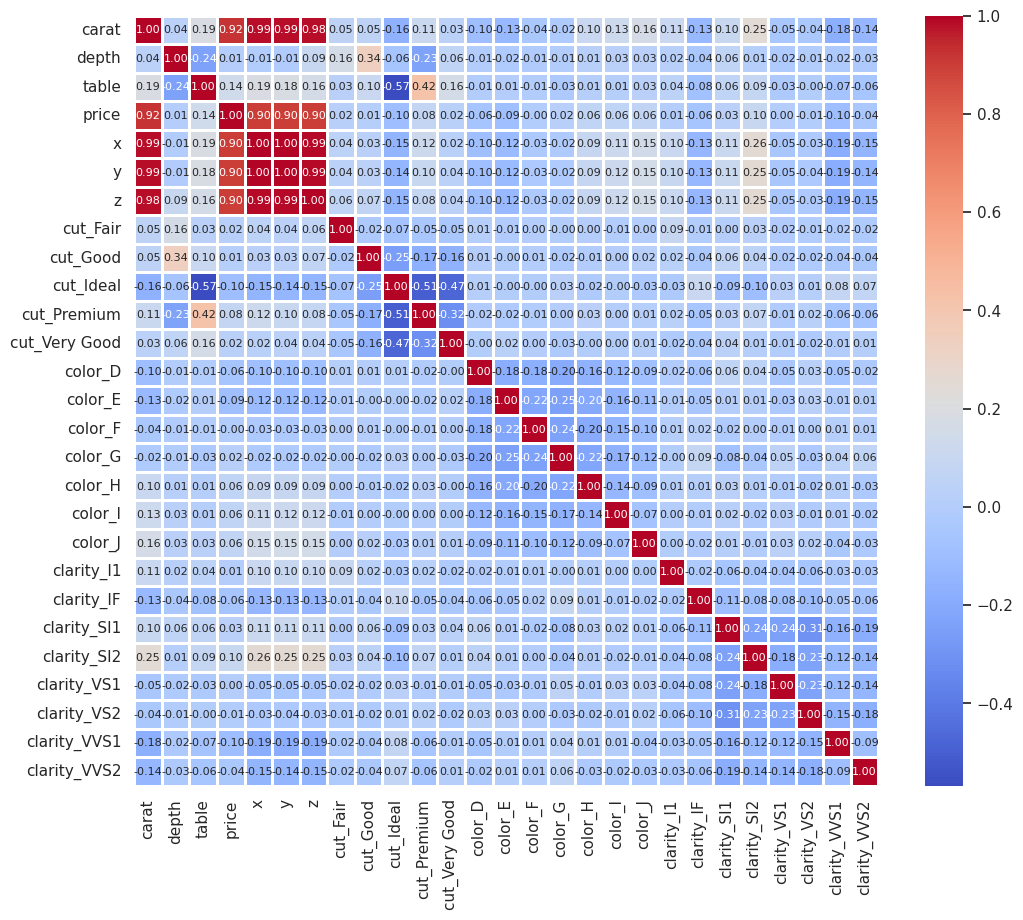

In [18]:
matrix_corr = df2.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(matrix_corr,  annot=True, annot_kws={'fontsize':8}, fmt='.2f', linewidths=2, cmap='coolwarm')
plt.show()

It can be seen that the variables 'carat', 'x', 'y', 'z' have a strong correlation with the target variable.<br>
No strong negative correlations are observed in the matrix

## Model development and evaluation

If what I want to estimate is a variable with an infinite numerical value: this is a *regression problem*

### Simple linear regression

I will start with the simplest, using a linear regression with the explanatory variable that presents the most correlation "carat":

Mean square error (MSE): 0.0083
Determination coefficient (R2): 0.8538


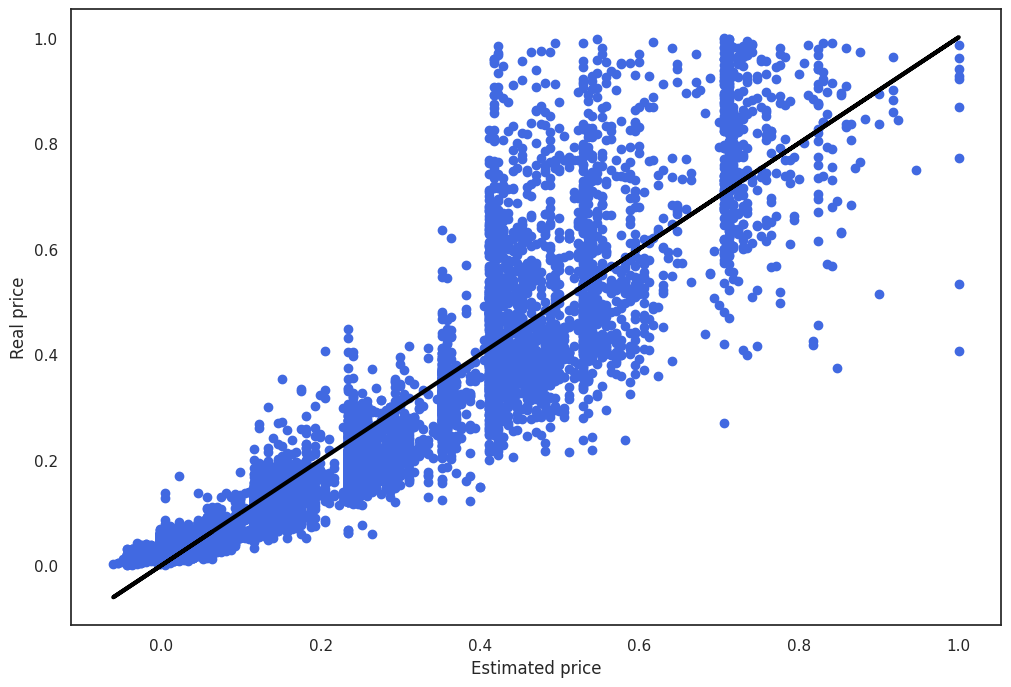

In [19]:
x_cols = ['carat']
y_cols = ['price']


scaler = MinMaxScaler()
X = scaler.fit_transform(df2[x_cols])
y = scaler.fit_transform(df2[y_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)


lg = linear_model.LinearRegression()
lg.fit(X_train, y_train)


# evaluating the model
y_pred = lg.predict(X_test)

print(f"Mean square error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Determination coefficient (R2): {r2_score(y_test, y_pred):.4f}")


fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_pred, y_test,  color='royalblue')
plt.plot(y_pred, y_pred, color='black', linewidth=3)

plt.xlabel('Estimated price')
plt.ylabel('Real price')
plt.show()

The results obtained are really good:


*   The *MSE* is a small number as desired. The smaller the better
*   *R2*: The closer the value is to 1, the greater the linear relationship
     between both variables.



Now I will try to improve the results by adding more variables to the regression:

### Multiple linear regression

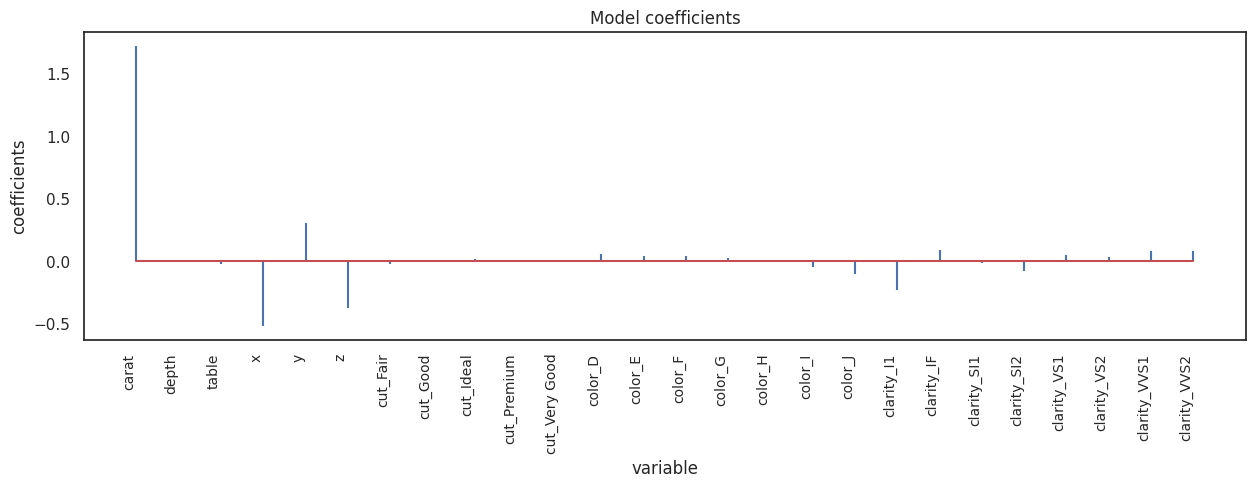

In [20]:
# All explanatory variables are taken
X = df2.drop(columns='price')
y = df2['price']

# The variables are normalized to better interpret the result
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X.values)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
y = scaler.fit_transform(df2[['price']])


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


# Model creation and training
modelo = linear_model.LinearRegression()
modelo.fit(X = X_train, y = y_train)

# Model coefficients
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )



fig, ax = plt.subplots(figsize=(15, 4))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coefficients')
ax.set_title('Model coefficients');

I could continue with just "carat" and "y", eliminating the other variables. For now I will leave the model as is, trying to find out if it is enough to improve the previous model


Mean square error (MSE): 0.0041
Root Mean Square Error (MSE): 0.0639
Determination coefficient (R2): 0.9270


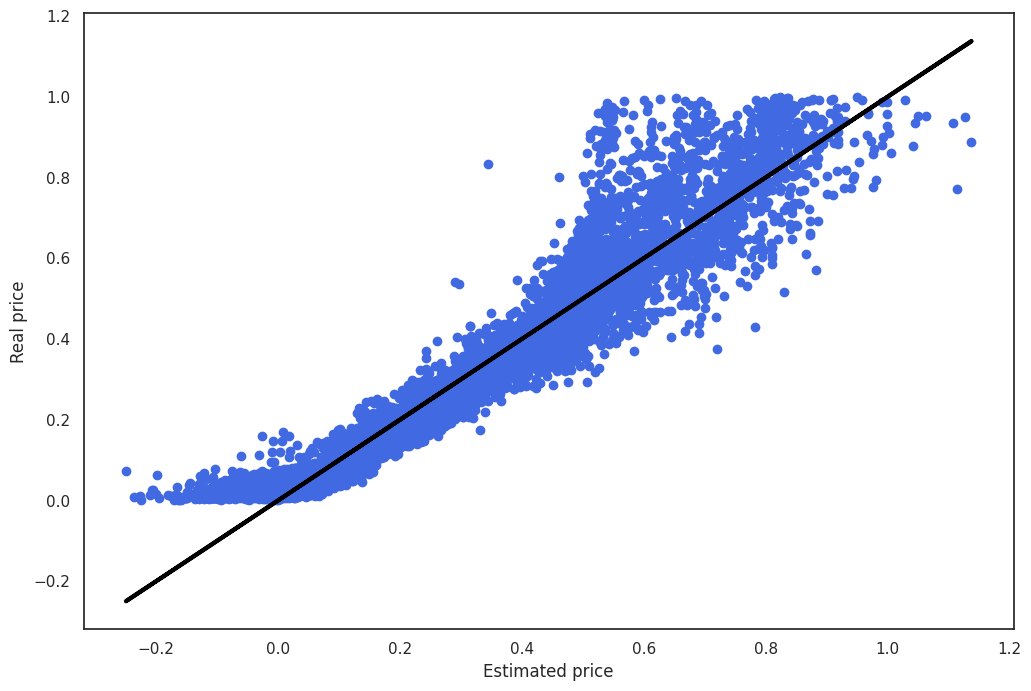

In [21]:
# I evaluate the model
y_pred = modelo.predict(X=X_test)
y_pred = y_pred.flatten()
y_pred[:10]

print("")
print(f"Mean square error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Square Error (MSE): {mean_squared_error(y_test, y_pred,squared=False):.4f}")
print(f"Determination coefficient (R2): {r2_score(y_test, y_pred):.4f}")

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_pred, y_test,  color='royalblue')
plt.plot(y_pred, y_pred, color='black', linewidth=3)

plt.xlabel('Estimated price')
plt.ylabel('Real price')
plt.show()

It is observed that the results are much better than the previous ones: with a determination coefficient so close to 1 it is considered a very good estimate.<br>
**Next, I will use the Ridge and Lasso regularizations to check if the model behaves better**

### Ridge regularization

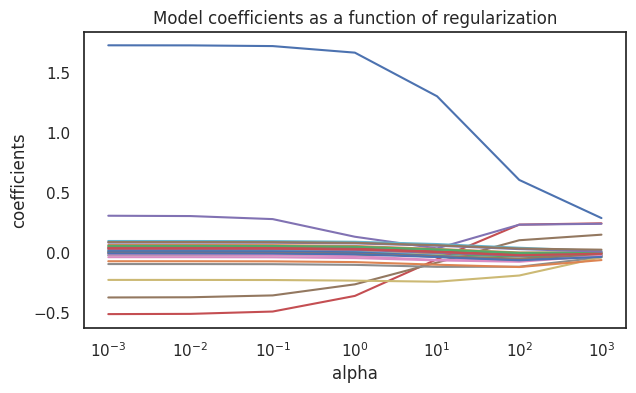

In [22]:
# Model creation and training (with CV search for optimal alpha value)
# By default RidgeCV uses the mean squared error
modelo = linear_model.RidgeCV(
            alphas          = np.logspace(-3, 3, 7),
            fit_intercept   = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)


# Evolution of the coefficients as a function of alpha
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coefficients')
ax.set_title('Model coefficients as a function of regularization');
plt.axis('tight')
plt.show()

Now it has been noted that **the regularization does not have any great impact** on the coefficients of the linear regression. Anyways, I will proceed with the process with Ridge and see the final results that the model spits out.

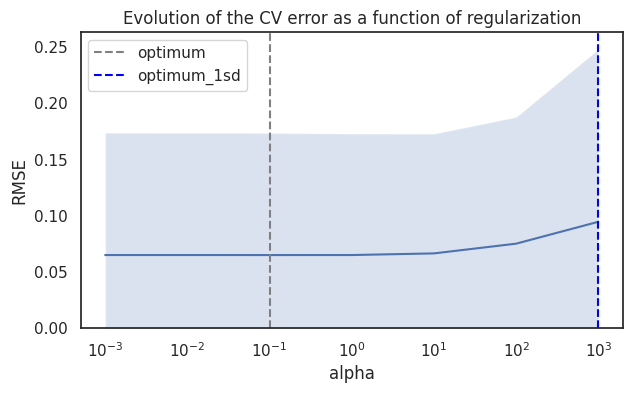

In [23]:
# Error evolution as a function of alpha

# modelo.cv_values stores the mse of cv for each value of alpha. It has dimensions (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 7)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 7)).std(axis=0)

# The square root is applied to go from mse to rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# The optimal and the optimal + 1std are identified
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Error graph +- 1 standard deviation
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'optimum'
)
ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'optimum_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolution of the CV error as a function of regularization')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [24]:

# Best alpha value found
print(f"The best alpha value found: {modelo.alpha_}")

The best alpha value found: 0.1


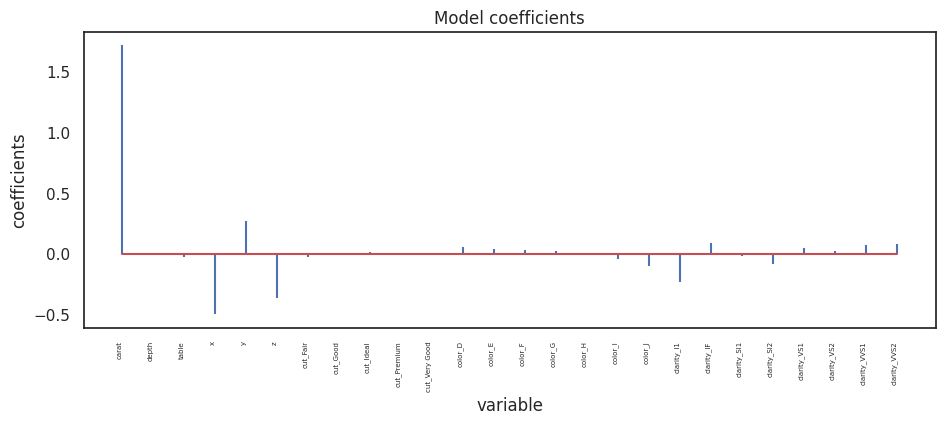

In [25]:
# Model coefficients
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coefficients')
ax.set_title('Model coefficients');

<u>Model evaluation:</u>

In [26]:
y_pred = modelo.predict(X=X_test)
y_pred = y_pred.flatten()
y_pred[:10]

print("")
print(f"Mean square error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Square Error (MSE): {mean_squared_error(y_test, y_pred,squared=False):.4f}")
print(f"Determination coefficient (R2): {r2_score(y_test, y_pred):.4f}")


Mean square error (MSE): 0.0041
Root Mean Square Error (MSE): 0.0639
Determination coefficient (R2): 0.9270


**I obtain the same results as in multiple linear regression, therefore I have not improved the model with Ridge regularization.**

### Lasso regularization

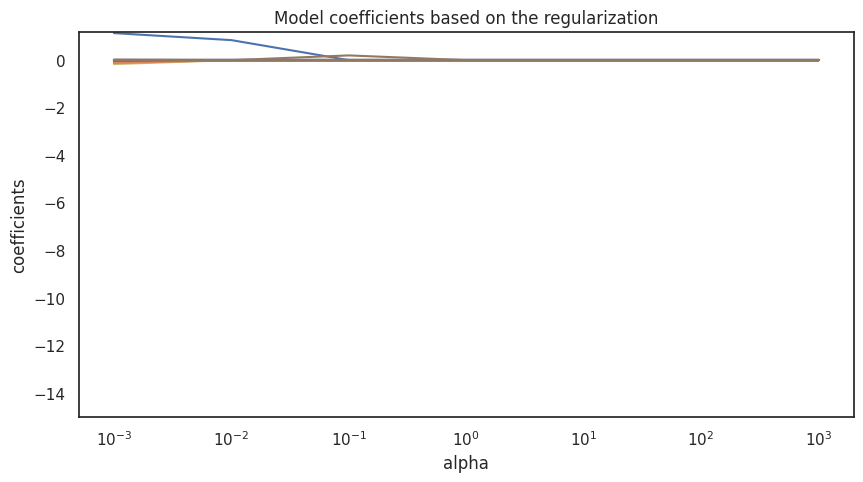

In [27]:
# Model creation and training (with CV search for optimal alpha value)
# By default LassoCV uses the mean squared error
alphas = np.logspace(-3, 3, 7)
modelo = linear_model.LassoCV(
            alphas          = alphas,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

# Evolution of the coefficients based on alpha
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = linear_model.Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coefficients')
ax.set_title('Model coefficients based on the regularization');


Up to this point it seems that there will be no improvement in the model, as happened with Ridge.

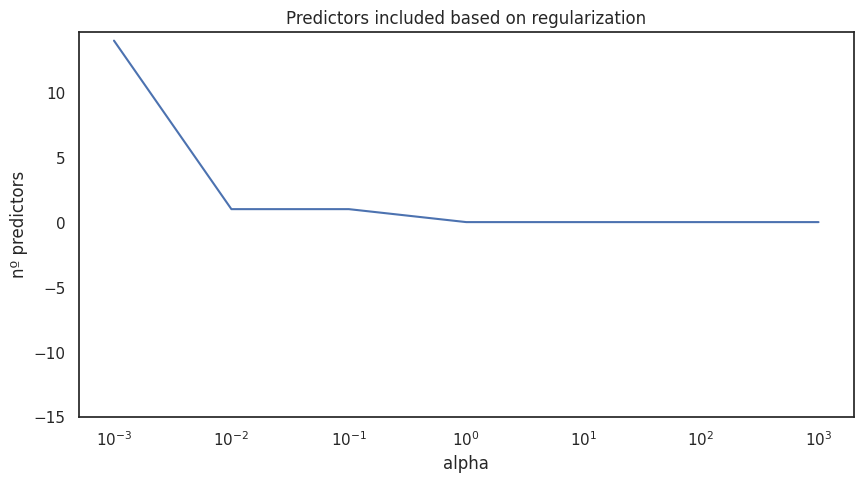

In [28]:
# Number of predictors included (coefficient !=0) based on alpha
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = linear_model.Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictors')
ax.set_title('Predictors included based on regularization');

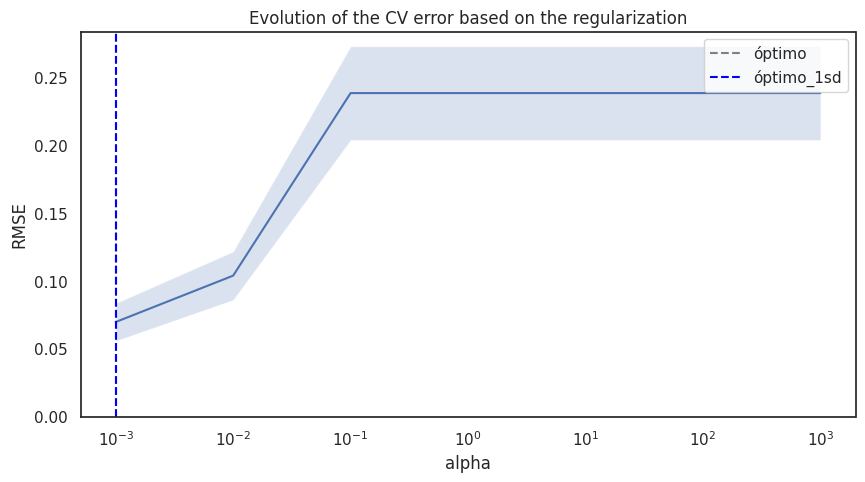

In [29]:
# Error evolution based on alpha
# ==============================================================================
# modelo.mse_path_ stores the mse of cv for each value of alpha. Has dimensions (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# The square root is applied to go from mse to rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# The optimal and the optimal + 1std are identified
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Error graph +- 1 standard deviation
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolution of the CV error based on the regularization')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [30]:
# Best alpha value found
print(f"The best alpha value found: {modelo.alpha_}")

The best alpha value found: 0.001


In [31]:
# Best alpha value found + 1sd
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"The best alpha value found + 1 standard deviation: {optimo_1sd}")

The best alpha value found + 1 standard deviation: [0.001]


In [32]:
value = 0.001

modelo = linear_model.Lasso(alpha= value)
modelo.fit(X_train, y_train)

Lasso(alpha=0.001)

In [33]:
# Model coefficients
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()})

# Predictors included in the model (coefficient != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,carat,1.150782
8,cut_Ideal,0.008541
11,color_D,0.015308
12,color_E,0.003246
13,color_F,0.001010
15,color_H,-0.023609
16,color_I,-0.050556
17,color_J,-0.092202
18,clarity_I1,-0.148395
19,clarity_IF,0.024286


The result is as expected: The variable that has the greatest correlation with the objective is "carat."

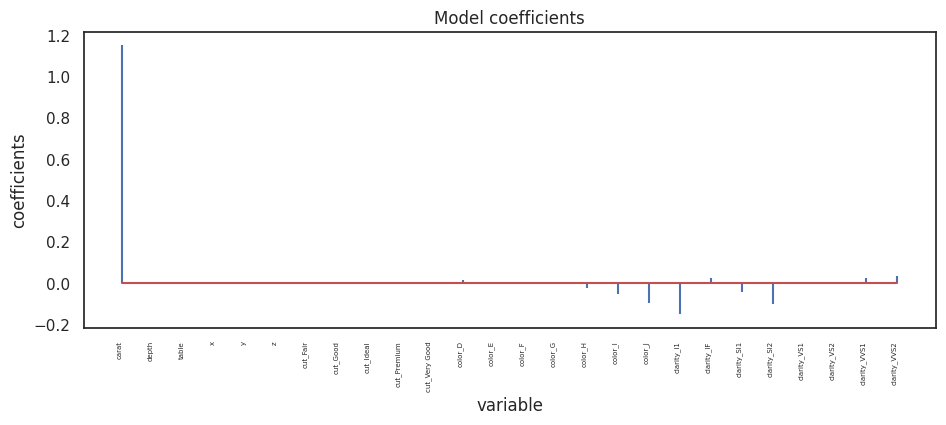

In [34]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coefficients')
ax.set_title('Model coefficients');

In [35]:
# Test predictions
y_test = modelo.predict(X=X_test)
y_test = y_test.flatten()
y_test[:10]

# Model test error
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = y_test,
                squared = False
             )
print("")
print(f"Mean square error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Square Error (MSE): {mean_squared_error(y_test, y_pred,squared=False):.4f}")
print(f"Determination coefficient (R2): {r2_score(y_test, y_pred):.4f}")


Mean square error (MSE): 0.0007
Root Mean Square Error (MSE): 0.0271
Determination coefficient (R2): 0.9846


<u>I can say that the results are almost perfect becuase:</u>


*   **The Determination coefficient (R2) is very close to 1**, means that model explain all the variability in the target variable price. When 1 is assumed to be the ideal result
*   **The mean square error (MSE) has been concisely improved.**



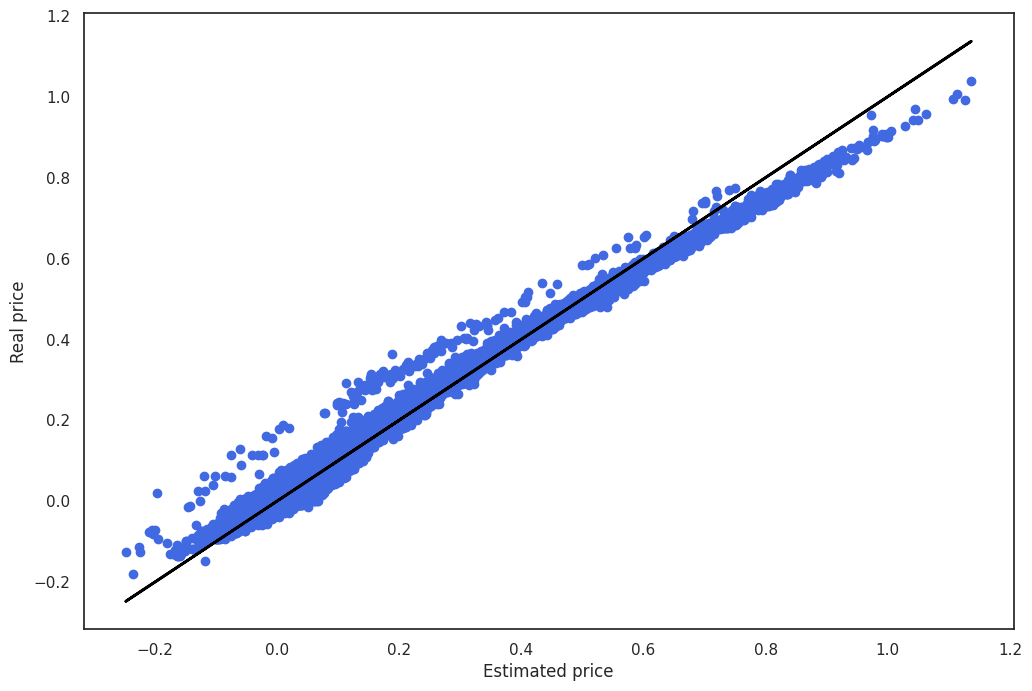

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_pred, y_test,  color='royalblue')
plt.plot(y_pred, y_pred, color='black', linewidth=2)

plt.xlabel('Estimated price')
plt.ylabel('Real price')
plt.show()

**The effect of Lasso regularization has concentrated the points, minimizing the MSE**

I can affirm and demonstrate that Lasso regularization has been the most effective method in achieving results to solve this supervised regression problem.